![](https://logos-download.com/wp-content/uploads/2016/11/Y_Combinator_logo_text_wordmark.png)

# Predict companies' performance - Part 1/2

[Y-Combinator](https://www.ycombinator.com/) is one of the most famous incubator in the world. A lot of enormous licorn like: 
 
* [Dropbox](https://www.dropbox.com/) 
* [Airbnb](https://www.airbnb.com/) 
* [Coinbase](https://www.coinbase.com/) 
* [Stripe](https://stripe.com/) 
* [Zapier](https://zapier.com/)

One thing that would really be of interest for them is to know what are the factors that drives success. Therefore, YC would like to know whether spendings has an influence on a company's profit. 


* Import `Marketing_Spending.csv` dataset and try to create a simple linear regression model using the template and predict a company's profit based on its marketing spendings. 

## Step 1 - Import Data 🤹‍♀️

- Import usual librairies

In [ ]:
# Import
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

- Import `Maketing_Spending.csv` dataset

In [ ]:
df = pd.read_csv("/Users/antoinekrajnc/JEDHA Dropbox/Data_Sciences/ESSENTIALS_PROGRAM/V3/M04-Machine_learning/D01-Machine_learning_regressions/01-Exercises/src/Marketing_Spending.csv")
df.head()

,Marketing Spending,Profit
0,165349.20,192261.83
1,162597.70,191792.06
2,153441.51,191050.39
3,144372.41,182901.99
4,142107.34,166187.94


## Step 2 - EDA 📊

- Plot the relationship between Profit and Marketing spending

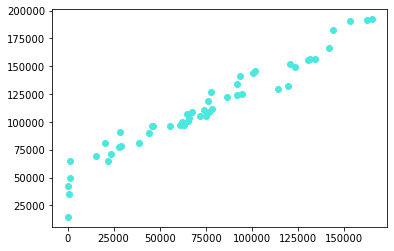

In [ ]:
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], color="#4BE8E0")
plt.show()

  * Show your dataset's main statistics

In [ ]:
df.describe(include="all")

,Marketing Spending,Profit
count,50.000000,50.000000
mean,73721.615600,112012.639200
std,45902.256482,40306.180338
min,0.000000,14681.400000
25%,39936.370000,90138.902500
50%,73051.080000,107978.190000
75%,101602.800000,139765.977500
max,165349.200000,192261.830000


* Check if you see missing values 

In [ ]:
)df.isnull().any(

Marketing Spending    False
Profit                False
dtype: bool

## Step 3 - Preprocessing 🍳

- Split the dataset in $X$ and $y$ variables

In [ ]:
# Separate target variable Y from features X
print("Separating target variable from features...")

## Choose the columns you want to have as your features
features_list = ["Marketing Spending"]

X = df.loc[:,features_list] # We add feature_list into our loc 
y = df.loc[:,"Profit"] # We set "Profit" as the target variable

print("...Done.")
print()

Separating target variable from features...
...Done.



- Split your data in train and test sets

In [ ]:
# Divide dataset Train set & Test set 
## First we import train_test_split


print("Splitting dataset into train set and test set...")
## Then we use train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0)

print("...Done.")   

Splitting dataset into train set and test set...
...Done.


* Normalize $X_{train}$

In [ ]:
# Encoding categorical features and standardizing numeric features

print("#### X_train BEFORE preprocessing ####")
print(X_train.head())
print()

print("Encoding categorical features and standardizing numerical features...")
## First let's import libraries
## StandardScaler to scale data (i.e apply Z-score)
## OneHotEncoder to encode categorical variables


numeric_features = [0] # Choose which column index we are going to scale
numeric_transformer = StandardScaler()

"""
categorical_features = [0] 
categorical_transformer = OneHotEncoder()
"""

# Apply ColumnTransformer to create a pipeline that will apply the above preprocessing
feature_encoder = ColumnTransformer(
    transformers=[
        #('cat', categorical_transformer, categorical_features),    
        ('num', numeric_transformer, numeric_features)
        ]
    )

X_train = feature_encoder.fit_transform(X_train)
print("...Done.")
print("#### X_train AFTER preprocessing ####")
print(X_train[0:5,:]) # print first 5 rows (not using iloc since now X_train became a numpy array)
print()

#### X_train BEFORE preprocessing ####
    Marketing Spending
33            55493.95
35            46014.02
26            75328.87
34            46426.07
18            91749.16

Encoding categorical features and standardizing numerical features...
...Done.
#### X_train AFTER preprocessing ####
[[-0.35006454]
 [-0.55530319]
 [ 0.07935762]
 [-0.54638238]
 [ 0.43485371]]



## Build your model 🏋️‍♂️

- Load and fit the model !

In [ ]:
# Train model
print("Train model...")
regressor = LinearRegression()
regressor.fit(X_train, y_train) # This steps is the actual training !
print("...Done.")

Train model...
...Done.


- Use your model to make predictions on train set

In [ ]:
# Predictions on training set
print("Predictions on training set...")
y_train_pred = regressor.predict(X_train)
print("...Done.")
print(y_train_pred[:5]) # print first 5 rows (not using iloc since now y_train became a numpy array)
print()

Predictions on training set...
...Done.
[ 95676.21073667  87602.88620742 112568.08084243  87953.79738211
 126551.97418703]



- Now use your model to make predictions on test set (make sure you apply the same pre-processing pipeline)

In [ ]:
### Testing pipeline ###
print("--- Testing pipeline ---")

# Standardizing numeric features
print("Standardizing numerical features...")
print(X_test)
print()

X_test = feature_encoder.transform(X_test)

print("...Done.")
print(X_test[:5]) # print first 5 rows (not using iloc since now X_test became a numpy array)
print()

# Predictions on test set
print("Predictions on test set...")
y_test_pred = regressor.predict(X_test)
print("...Done.")
print(y_test_pred[:5])
print()

--- Testing pipeline ---
Standardizing numerical features...
    Marketing Spending
28            66051.52
11           100671.96
10           101913.08
41            27892.92
2            153441.51
27            72107.60
38            20229.59
31            61136.38
22            73994.56
4            142107.34

...Done.
[[-0.1214952 ]
 [ 0.6280306 ]
 [ 0.65490061]
 [-0.94762148]
 [ 1.77048111]]

Predictions on test set...
...Done.
[104667.27805998 134150.83410578 135207.80019517  72170.54428856
 179090.58602508]



- Compare your train and test scores of your model

In [ ]:
# Performance assessment
print("--- Assessing the performances of the model ---")

# Print R^2 scores
print("R2 score on training set : ", regressor.score(X_train, y_train))
print("R2 score on test set : ", regressor.score(X_test, y_test))

--- Assessing the performances of the model ---
R2 score on training set :  0.9449589778363044
R2 score on test set :  0.9464587607787219


- What can you say about these scores ?

>The R2-scores are close to 1 which is very satisfying. The test score is close to the train score so the model is able to generalize on new data !